In [1]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

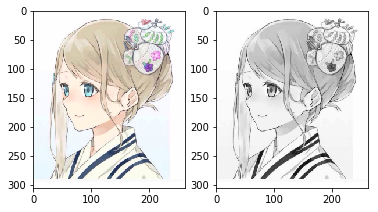

In [2]:
img_path = './img/t.png'
bgrimg = cv2.imread(img_path)
rgbimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2RGB)

grayimg = cv2.imread(img_path, 0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(rgbimg)

plt.subplot(1,2,2)
plt.imshow(grayimg,cmap = 'gray')

# cv2.threshold(img, thresh, pixel,methods)
- img: 要处理的图像
- thresh: 阈值
- pixel: 高(低)于此阈值时设置的值
- methods: 处理模式
  - cv2.THRESH_BINARY
  - cv2.THRESH_BINARY_INV
  - cv2.THRESH_TRUNC
  - cv2.THRESH_TOZERO 
  - cv2.THRESH_TOZERO_INV 
- ret
- dst: 目标图像

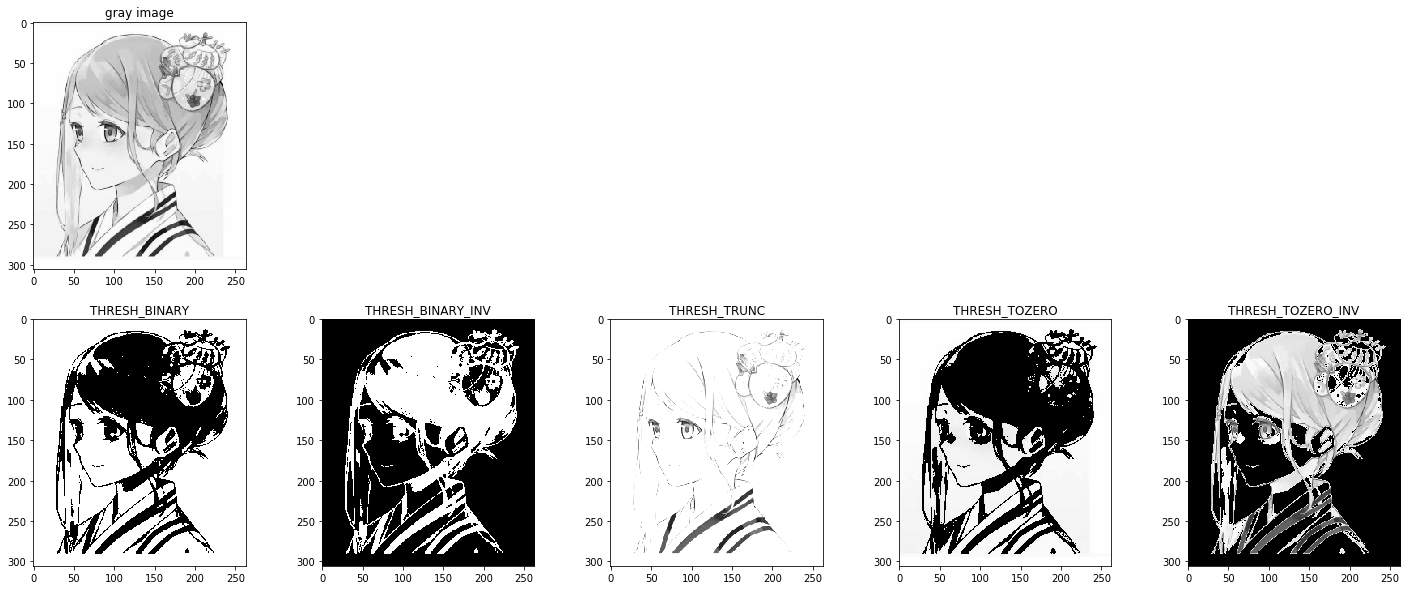

In [3]:
ret, dst1 = cv2.threshold(grayimg, 220, 255,cv2.THRESH_BINARY)
ret, dst2 = cv2.threshold(grayimg, 220, 255,cv2.THRESH_BINARY_INV)
ret, dst3 = cv2.threshold(grayimg, 180, 255,cv2.THRESH_TRUNC)
ret, dst4 = cv2.threshold(grayimg, 230, 255,cv2.THRESH_TOZERO)
ret, dst5 = cv2.threshold(grayimg, 230, 255,cv2.THRESH_TOZERO_INV)

plt.figure(figsize = (25,10))

plt.subplot(2,5,1)
plt.title('gray image')
plt.imshow(grayimg, cmap = 'gray')

plt.subplot(2,5,6)
plt.title('THRESH_BINARY')
plt.imshow(dst1, cmap = 'gray')

plt.subplot(2,5,7)
plt.title('THRESH_BINARY_INV')
plt.imshow(dst2, cmap = 'gray')

plt.subplot(2,5,8)
plt.title('THRESH_TRUNC')
plt.imshow(dst3, cmap = 'gray')

plt.subplot(2,5,9)
plt.title('THRESH_TOZERO')
plt.imshow(dst4, cmap = 'gray')

plt.subplot(2,5,10)
plt.title('THRESH_TOZERO_INV')
plt.imshow(dst5, cmap = 'gray')

# 自适应阈值二值化
```
dst = cv2.adaptiveThreshold(src, maxval, thresh_type, type, Block Size, C)
```
- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- thresh_type： 阈值的计算方法，包含以下2种类型：
  - cv2.ADAPTIVE_THRESH_MEAN_C : 局部邻域块的平均值
  - cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 局部邻域块的高斯加权和
- type：二值化操作的类型，与固定阈值函数相同，包含以下5种类型： 
  - cv2.THRESH_BINARY
  - cv2.THRESH_BINARY_INV
  - cv2.THRESH_TRUNC
  - cv2.THRESH_TOZERO
  - cv2.THRESH_TOZERO_INV  
- Block Size： 图片中分块的大小
- C ：阈值计算方法中的常数项


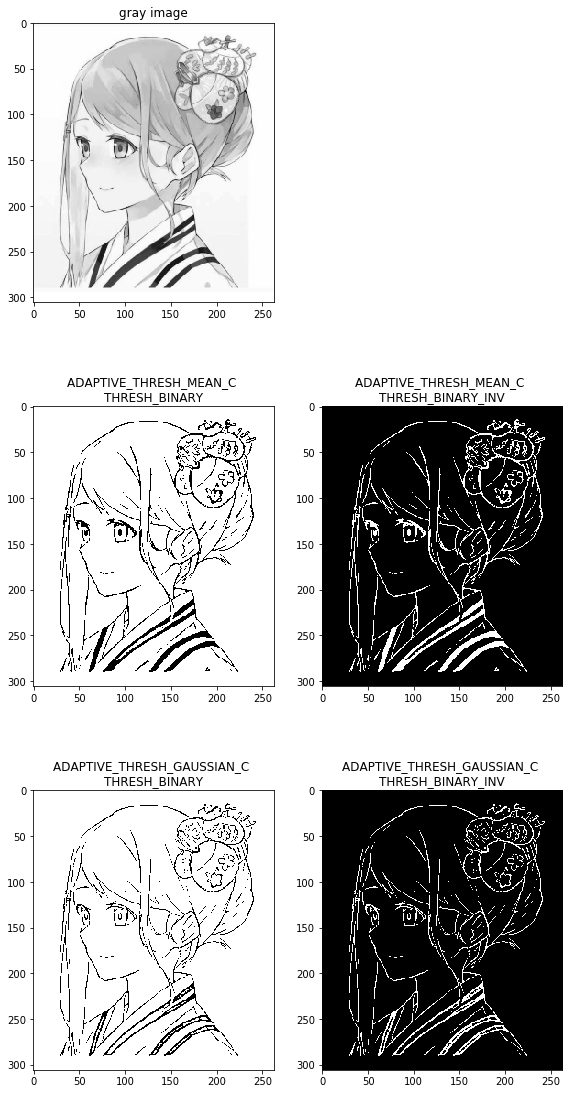

In [4]:
dst1 = cv2.adaptiveThreshold(grayimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 23)
dst2 = cv2.adaptiveThreshold(grayimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 9, 23)

dst21 = cv2.adaptiveThreshold(grayimg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 23)
dst22 = cv2.adaptiveThreshold(grayimg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 23)



plt.figure(figsize = (25,20))

plt.subplot(3,5,1)
plt.title('gray image')
plt.imshow(grayimg, cmap = 'gray')

plt.subplot(3,5,6)
plt.title('ADAPTIVE_THRESH_MEAN_C \nTHRESH_BINARY')
plt.imshow(dst1, cmap = 'gray')

plt.subplot(3,5,7)
plt.title('ADAPTIVE_THRESH_MEAN_C \nTHRESH_BINARY_INV')
plt.imshow(dst2, cmap = 'gray')


plt.subplot(3,5,11)
plt.title('ADAPTIVE_THRESH_GAUSSIAN_C \nTHRESH_BINARY')
plt.imshow(dst21, cmap = 'gray')

plt.subplot(3,5,12)
plt.title('ADAPTIVE_THRESH_GAUSSIAN_C \nTHRESH_BINARY_INV')
plt.imshow(dst22, cmap = 'gray')
